# Application 1: ProvStore Documents
Identifying owners of provenance documents from their provenance network metrics

* **Goal**: To determine if the provenance network analytics method can identify the owner of a provenance document from its provenance network metrics.
* **Training data**: In order to ensure that there are sufficient samples to represent a user's provenance documents the Training phase, we limit our experiment to users who have at least 20 documents. There are fourteen such users (the authors were excluded to avoid bias), who we named $u_{1}, u_{2}, \ldots, u_{14}$. Their numbers of documents range between 21 and 6,745, with the total number of documents in the data set is 13,870.
* **Classification labels**: $\mathcal{L} = \left\{ u_1, u_2, \ldots, u_{14} \right\} $, where $l_{x} = u_i$ if the provenance document $x$ belongs to user $u_i$. Hence, there are 14 labels in total.


## Reading data
For each provenance document, we calculate the 22 provenance network metrics. The dataset provided contains those metrics values for 13,870 provenance documents along with the owner identifier (i.e. $u_{1}, u_{2}, \ldots, u_{14}$).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("provstore/data.csv")
df.head()

,label,entities,agents,activities,nodes,edges,diameter,assortativity,acc,acc_e,...,mfd_e_a,mfd_e_ag,mfd_a_e,mfd_a_a,mfd_a_ag,mfd_ag_e,mfd_ag_a,mfd_ag_ag,mfd_der,powerlaw_alpha
0,u_3,17,5,9,31,49,6,-0.196362,0.444709,0.466667,...,5,8,4,2,5,0,0,0,3,-1.0
1,u_2,7,0,2,9,0,-1,-1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,-1,-1.0
2,u_2,7,0,2,9,0,-1,-1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,-1,-1.0
3,u_2,7,0,2,9,0,-1,-1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,-1,-1.0
4,u_2,7,0,2,9,0,-1,-1.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,-1,-1.0


In [3]:
df.describe()

,entities,agents,activities,nodes,edges,diameter,assortativity,acc,acc_e,acc_a,...,mfd_e_a,mfd_e_ag,mfd_a_e,mfd_a_a,mfd_a_ag,mfd_ag_e,mfd_ag_a,mfd_ag_ag,mfd_der,powerlaw_alpha
count,13870.000000,13870.00000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,...,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000,13870.000000
mean,9.913338,2.08695,1.836193,13.836482,19.212689,0.868926,-0.628690,0.347835,0.341142,0.323606,...,1.312761,1.754939,1.073540,0.709229,0.752127,0.017448,0.014924,0.030353,2.185436,-0.916534
std,28.931915,2.27716,18.570823,43.352894,134.640366,1.943905,0.376718,0.394531,0.409577,0.395727,...,1.769329,1.314874,1.622606,1.343363,1.077628,0.200902,0.152351,0.209759,5.211118,0.612437
min,0.000000,0.00000,0.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.000000,1.00000,0.000000,5.000000,5.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
50%,4.000000,1.00000,1.000000,7.000000,9.000000,1.000000,-0.592949,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,-1.000000
75%,5.000000,3.00000,2.000000,10.000000,13.000000,2.000000,-0.350000,0.674147,0.750000,0.666667,...,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,-1.000000
max,1188.000000,51.00000,1580.000000,2776.000000,6853.000000,10.000000,1.000000,1.000000,1.000000,1.000000,...,52.000000,44.000000,51.000000,52.000000,43.000000,4.000000,5.000000,6.000000,303.000000,8.184413


In [4]:
# The number of each label in the dataset
df.label.value_counts()

u_3     6745
u_8     4449
u_5     1327
u_2      487
u_12     312
u_14     150
u_9      141
u_6       71
u_7       66
u_4       34
u_1       25
u_13      21
u_10      21
u_11      21
Name: label, dtype: int64

 ## Experiment

In [5]:
from analytics import balance_smote, test_classification

**Balancing the data**

With an unbalanced like the above, the resulted trained classifier will typically be skewed towards the majority labels. In order to mitigate this, we balance the dataset using the [SMOTE Oversampling Method](https://www.jair.org/media/953/live-953-2037-jair.pdf).

In [6]:
df = balance_smote(df)

Original data shapes: (13870, 22) (13870,)
Balanced data shapes: (94430, 22) (94430,)


**Cross Validation tests**: We now run the cross validation tests on the dataset (`df`) using all the features (`combined`), only the generic network metrics (`generic`), and only the provenance-specific network metrics (`provenance`). Please refer to [Cross Validation Code.ipynb](Cross%20Validation%20Code.ipynb) for the detailed description of the cross validation code.

In [7]:
results, importances = test_classification(df)

Accuracy: 98.13% ±0.0080 <-- combined
Accuracy: 92.32% ±0.0157 <-- generic
Accuracy: 98.11% ±0.0079 <-- provenance


**Result**: The outputs above is the accuracy of the classifier in identifying the owner of a provenance document from ProvStore using all provenance network metrics (i.e. `combined`), only generic network metrics, and only provenance-specific network metrics.

The individual accuracy scores are stored in `results` and the importance of every feature in each test in `imps` (both are pandas Dataframe objects).

### Saving experiments' results (optional)

Optionally, we can save the test results to save time the next time we want to re-explore them:

In [8]:
results.to_pickle("provstore/results.pkl")
importances.to_pickle("provstore/importances.pkl")

Next time, we can reload the results as follows:

In [9]:
import pandas as pd
results = pd.read_pickle("provstore/results.pkl")
importances = pd.read_pickle("provstore/importances.pkl")
results.shape, importances.shape  # showing the shape of the data (for checking)

((3000, 2), (1000, 22))

### The importance of features

We plot the importance of each feature (from the `combined` test, which used all 22 features).

In [10]:
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

In [11]:
# Rename the columns with Math notation for consistency with the metrics symbols in the paper
feature_name_maths_mapping = {
    "entities": "$n_e$", "agents": "$n_{ag}$", "activities": "$n_a$", "nodes": "$n$", "edges": "$e$",
    "diameter": "$d$", "assortativity": "$r$", "acc": "$\\mathsf{ACC}$",
    "acc_e": "$\\mathsf{ACC}_e$",  "acc_a": "$\\mathsf{ACC}_a$",  "acc_ag": "$\\mathsf{ACC}_{ag}$",
    "mfd_e_e": "$\\mathrm{mfd}_{e \\rightarrow e}$", "mfd_e_a": "$\\mathrm{mfd}_{e \\rightarrow a}$",
    "mfd_e_ag": "$\\mathrm{mfd}_{e \\rightarrow ag}$", "mfd_a_e": "$\\mathrm{mfd}_{a \\rightarrow e}$",
    "mfd_a_a": "$\\mathrm{mfd}_{a \\rightarrow a}$", "mfd_a_ag": "$\\mathrm{mfd}_{a \\rightarrow ag}$",
    "mfd_ag_e": "$\\mathrm{mfd}_{ag \\rightarrow e}$", "mfd_ag_a": "$\\mathrm{mfd}_{ag \\rightarrow a}$",
    "mfd_ag_ag": "$\\mathrm{mfd}_{ag \\rightarrow ag}$", "mfd_der": "$\\mathrm{mfd}_\\mathit{der}$", "powerlaw_alpha": "$\\alpha$"
}
importances.rename(columns=feature_name_maths_mapping, inplace=True)

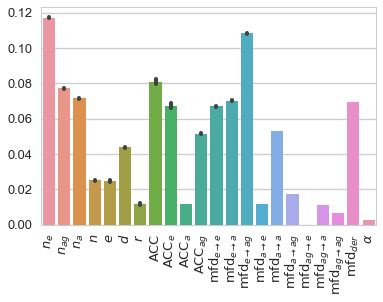

In [12]:
plot = sns.barplot(data=importances)
for i in plot.get_xticklabels():
    i.set_rotation(90)

From the above chart, the three most important features for this application are: $n_e$, $\mathrm{mfd}_{e \rightarrow ag}$, and $\mathsf{ACC}$.